# Bootcamp Quiz - Imputing and Visualizing Data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# Diabetes dataset

df = pd.read_csv("diabetes_quiz.csv")
df.head(10)

,num_preg,diastolic_bp,thickness,bmi,age,diabetes
0,6,72,35,33.6,50,True
1,1,66,29,26.6,31,False
2,8,64,0,23.3,32,True
3,1,66,23,28.1,21,False
4,0,40,35,43.1,33,True
5,5,74,0,25.6,30,False
6,3,50,32,31.0,26,True
7,10,0,0,35.3,29,False
8,2,70,45,30.5,53,True
9,8,96,0,0.0,54,True


## 1. What is the mean Diastolic BP?

In [4]:
df.describe()

,num_preg,diastolic_bp,thickness,bmi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,69.105469,20.536458,31.992578,33.240885
std,3.369578,19.355807,15.952218,7.884160,11.760232
min,0.000000,0.000000,0.000000,0.000000,21.000000
25%,1.000000,62.000000,0.000000,27.300000,24.000000
50%,3.000000,72.000000,23.000000,32.000000,29.000000
75%,6.000000,80.000000,32.000000,36.600000,41.000000
max,17.000000,122.000000,99.000000,67.100000,81.000000


## 2. Create a histogram of Diastolic BP. 
## How does the Diastolic BP distribution look?

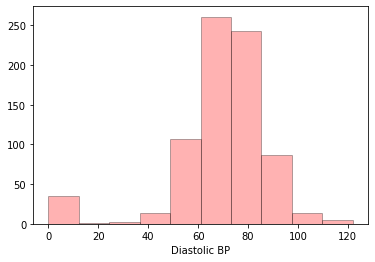

In [6]:
fig, ax = plt.subplots()
ax.hist(df['diastolic_bp'], color = 'red', alpha=.3, edgecolor = 'black', bins=10)
ax.set(xlabel="Diastolic BP")
plt.show()

## Convert the inappropriate zero values within the dataset into null/missing values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 6 columns):
num_preg        768 non-null int64
diastolic_bp    768 non-null int64
thickness       768 non-null int64
bmi             768 non-null float64
age             768 non-null int64
diabetes        768 non-null bool
dtypes: bool(1), float64(1), int64(4)
memory usage: 30.9 KB


In [15]:
mask = df[['num_preg', 'diastolic_bp', 'thickness','bmi','age','diabetes']] == 0
mask.head()

,num_preg,diastolic_bp,thickness,bmi,age,diabetes
0,False,False,False,False,False,False
1,False,False,False,False,False,True
2,False,False,True,False,False,False
3,False,False,False,False,False,True
4,True,False,False,False,False,False


In [16]:
df[mask] = np.nan
df.head(5)

,num_preg,diastolic_bp,thickness,bmi,age,diabetes
0,6.0,72.0,35.0,33.6,50,1.0
1,1.0,66.0,29.0,26.6,31,NaN
2,8.0,64.0,NaN,23.3,32,1.0
3,1.0,66.0,23.0,28.1,21,NaN
4,NaN,40.0,35.0,43.1,33,1.0


## 3. After replacing the zero values with null, how many missing values are there for Diastolic BP?

In [17]:
df["diastolic_bp"].isnull().sum()

35

## 4. What is now the minimum value for Diastolic BP?

In [18]:
df["diastolic_bp"].min()

24.0

## 5. What is the corrected mean for Diastolic BP?

In [19]:
df["diastolic_bp"].mean()

72.40518417462484

## 6. Create a new histogram of Diastolic BP. 
## How does the Diastolic BP distribution look following imputation?

C:\Users\Shivani Reddy\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Shivani Reddy\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


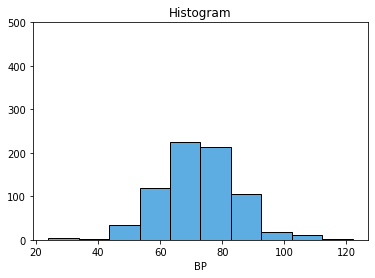

In [20]:
fig, ax = plt.subplots()
ax.hist(df['diastolic_bp'], color = '#5DADE2', edgecolor='black')
ax.set(xlabel="BP", title="Histogram")
ax.set_ylim((0, 500))

plt.show()

## 7. Create a scatterplot of BMI and Thickness
## What is the apparent relationship between the features BMI and Thickness?

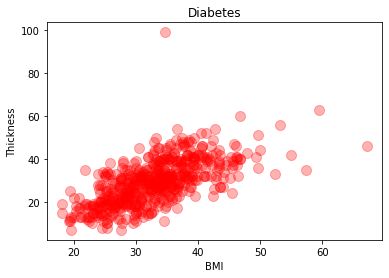

In [23]:
fig, ax = plt.subplots()
ax.scatter(df['bmi'], df['thickness'], 
           alpha=.3, s = 100, c = "red")
ax.set(title="Diabetes", xlabel='BMI', ylabel="Thickness")
plt.show()